# **1. Perkenalan Dataset**


Tahap pertama, Anda harus mencari dan menggunakan dataset **tanpa label** dengan ketentuan sebagai berikut:

1. **Sumber Dataset**:  
   Dataset dapat diperoleh dari berbagai sumber, seperti public repositories (*Kaggle*, *UCI ML Repository*, *Open Data*) atau data primer yang Anda kumpulkan sendiri.
   
2. **Ketentuan Dataset**:
   - **Tanpa label**: Dataset tidak boleh memiliki label atau kelas.
   - **Jumlah Baris**: Minimal 1000 baris untuk memastikan dataset cukup besar untuk analisis yang bermakna.
   - **Tipe Data**: Harus mengandung data **kategorikal** dan **numerikal**.
     - *Kategorikal*: Misalnya jenis kelamin, kategori produk.
     - *Numerikal*: Misalnya usia, pendapatan, harga.

3. **Pembatasan**:  
   Dataset yang sudah digunakan dalam latihan clustering (seperti customer segmentation) tidak boleh digunakan.

### Dataset yang digunakan adalah data set movies yang diambil dari kaggle, memiliki 7668 baris dan 5 kolom. Dan mengandung data kategorikal dan numerik.


# **2. Import Library**

Pada tahap ini, Anda perlu mengimpor beberapa pustaka (library) Python yang dibutuhkan untuk analisis data dan pembangunan model machine learning.

In [73]:
# Import necessary libraries

# Data handling
import pandas as pd
import numpy as np

# Preprocessing
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# Clustering Algorithms
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Model Evaluation
from sklearn.metrics import silhouette_score

# **3. Memuat Dataset**

Pada tahap ini, Anda perlu memuat dataset ke dalam notebook. Jika dataset dalam format CSV, Anda bisa menggunakan pustaka pandas untuk membacanya. Pastikan untuk mengecek beberapa baris awal dataset untuk memahami strukturnya dan memastikan data telah dimuat dengan benar.

Jika dataset berada di Google Drive, pastikan Anda menghubungkan Google Drive ke Colab terlebih dahulu. Setelah dataset berhasil dimuat, langkah berikutnya adalah memeriksa kesesuaian data dan siap untuk dianalisis lebih lanjut.

In [74]:
data = pd.read_csv('StudentPerformanceFactors.csv')
data

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


# **4. Exploratory Data Analysis (EDA)**

Pada tahap ini, Anda akan melakukan **Exploratory Data Analysis (EDA)** untuk memahami karakteristik dataset. EDA bertujuan untuk:

1. **Memahami Struktur Data**
   - Tinjau jumlah baris dan kolom dalam dataset.  
   - Tinjau jenis data di setiap kolom (numerikal atau kategorikal).

2. **Menangani Data yang Hilang**  
   - Identifikasi dan analisis data yang hilang (*missing values*). Tentukan langkah-langkah yang diperlukan untuk menangani data yang hilang, seperti pengisian atau penghapusan data tersebut.

3. **Analisis Distribusi dan Korelasi**  
   - Analisis distribusi variabel numerik dengan statistik deskriptif dan visualisasi seperti histogram atau boxplot.  
   - Periksa hubungan antara variabel menggunakan matriks korelasi atau scatter plot.

4. **Visualisasi Data**  
   - Buat visualisasi dasar seperti grafik distribusi dan diagram batang untuk variabel kategorikal.  
   - Gunakan heatmap atau pairplot untuk menganalisis korelasi antar variabel.

Tujuan dari EDA adalah untuk memperoleh wawasan awal yang mendalam mengenai data dan menentukan langkah selanjutnya dalam analisis atau pemodelan.

In [75]:
#Meninjau data
data

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6607 entries, 0 to 6606
Data columns (total 20 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   Hours_Studied               6607 non-null   int64 
 1   Attendance                  6607 non-null   int64 
 2   Parental_Involvement        6607 non-null   object
 3   Access_to_Resources         6607 non-null   object
 4   Extracurricular_Activities  6607 non-null   object
 5   Sleep_Hours                 6607 non-null   int64 
 6   Previous_Scores             6607 non-null   int64 
 7   Motivation_Level            6607 non-null   object
 8   Internet_Access             6607 non-null   object
 9   Tutoring_Sessions           6607 non-null   int64 
 10  Family_Income               6607 non-null   object
 11  Teacher_Quality             6529 non-null   object
 12  School_Type                 6607 non-null   object
 13  Peer_Influence              6607 non-null   obje

In [77]:
data.isnull().sum()

,0
Hours_Studied,0
Attendance,0
Parental_Involvement,0
Access_to_Resources,0
Extracurricular_Activities,0
Sleep_Hours,0
Previous_Scores,0
Motivation_Level,0
Internet_Access,0
Tutoring_Sessions,0


In [78]:
data.duplicated().sum()

0

In [79]:
data.describe(include='all')

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
count,6607.000000,6607.000000,6607,6607,6607,6607.00000,6607.000000,6607,6607,6607.000000,6607,6529,6607,6607,6607.000000,6607,6517,6540,6607,6607.000000
unique,NaN,NaN,3,3,2,NaN,NaN,3,2,NaN,3,3,2,3,NaN,2,3,3,2,NaN
top,NaN,NaN,Medium,Medium,Yes,NaN,NaN,Medium,Yes,NaN,Low,Medium,Public,Positive,NaN,No,High School,Near,Male,NaN
freq,NaN,NaN,3362,3319,3938,NaN,NaN,3351,6108,NaN,2672,3925,4598,2638,NaN,5912,3223,3884,3814,NaN
mean,19.975329,79.977448,NaN,NaN,NaN,7.02906,75.070531,NaN,NaN,1.493719,NaN,NaN,NaN,NaN,2.967610,NaN,NaN,NaN,NaN,67.235659
std,5.990594,11.547475,NaN,NaN,NaN,1.46812,14.399784,NaN,NaN,1.230570,NaN,NaN,NaN,NaN,1.031231,NaN,NaN,NaN,NaN,3.890456
min,1.000000,60.000000,NaN,NaN,NaN,4.00000,50.000000,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,NaN,NaN,55.000000
25%,16.000000,70.000000,NaN,NaN,NaN,6.00000,63.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,65.000000
50%,20.000000,80.000000,NaN,NaN,NaN,7.00000,75.000000,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,3.000000,NaN,NaN,NaN,NaN,67.000000
75%,24.000000,90.000000,NaN,NaN,NaN,8.00000,88.000000,NaN,NaN,2.000000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,69.000000


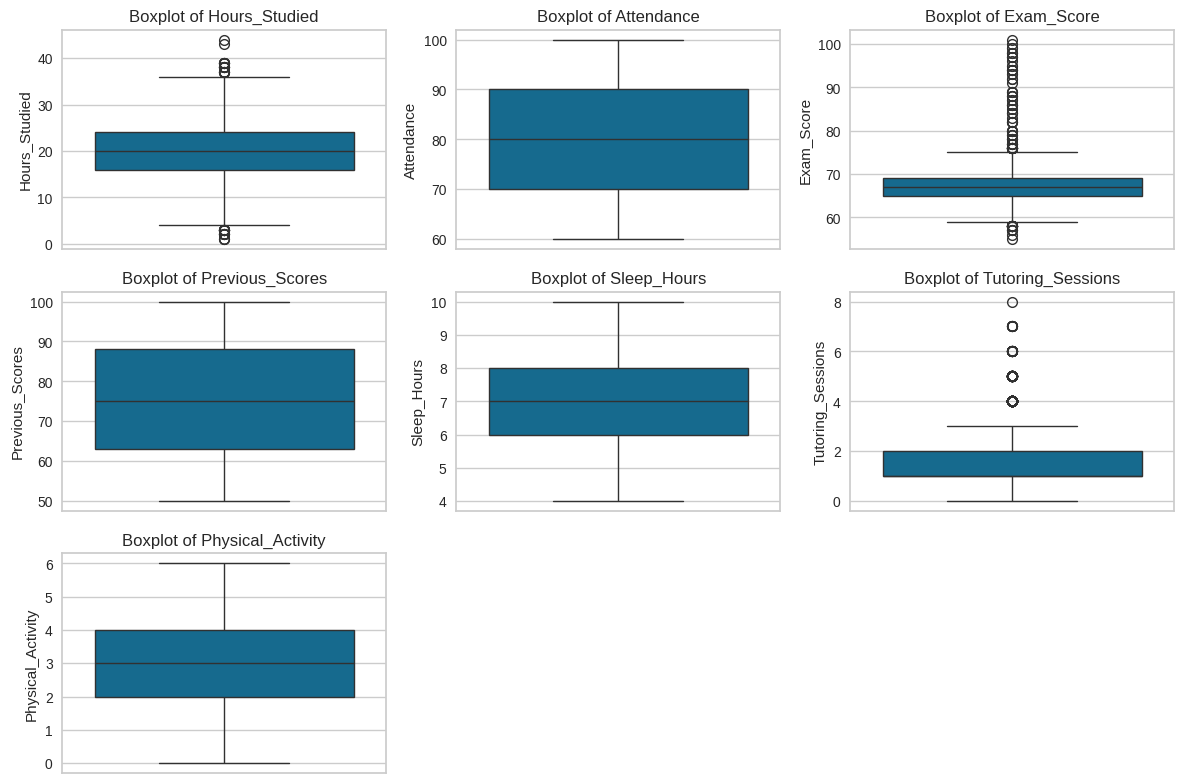

In [80]:

numerical_columns = ['Hours_Studied', 'Attendance', 'Exam_Score', 'Previous_Scores', 'Sleep_Hours', 'Tutoring_Sessions', 'Physical_Activity']

# Create a boxplot for each numerical column
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

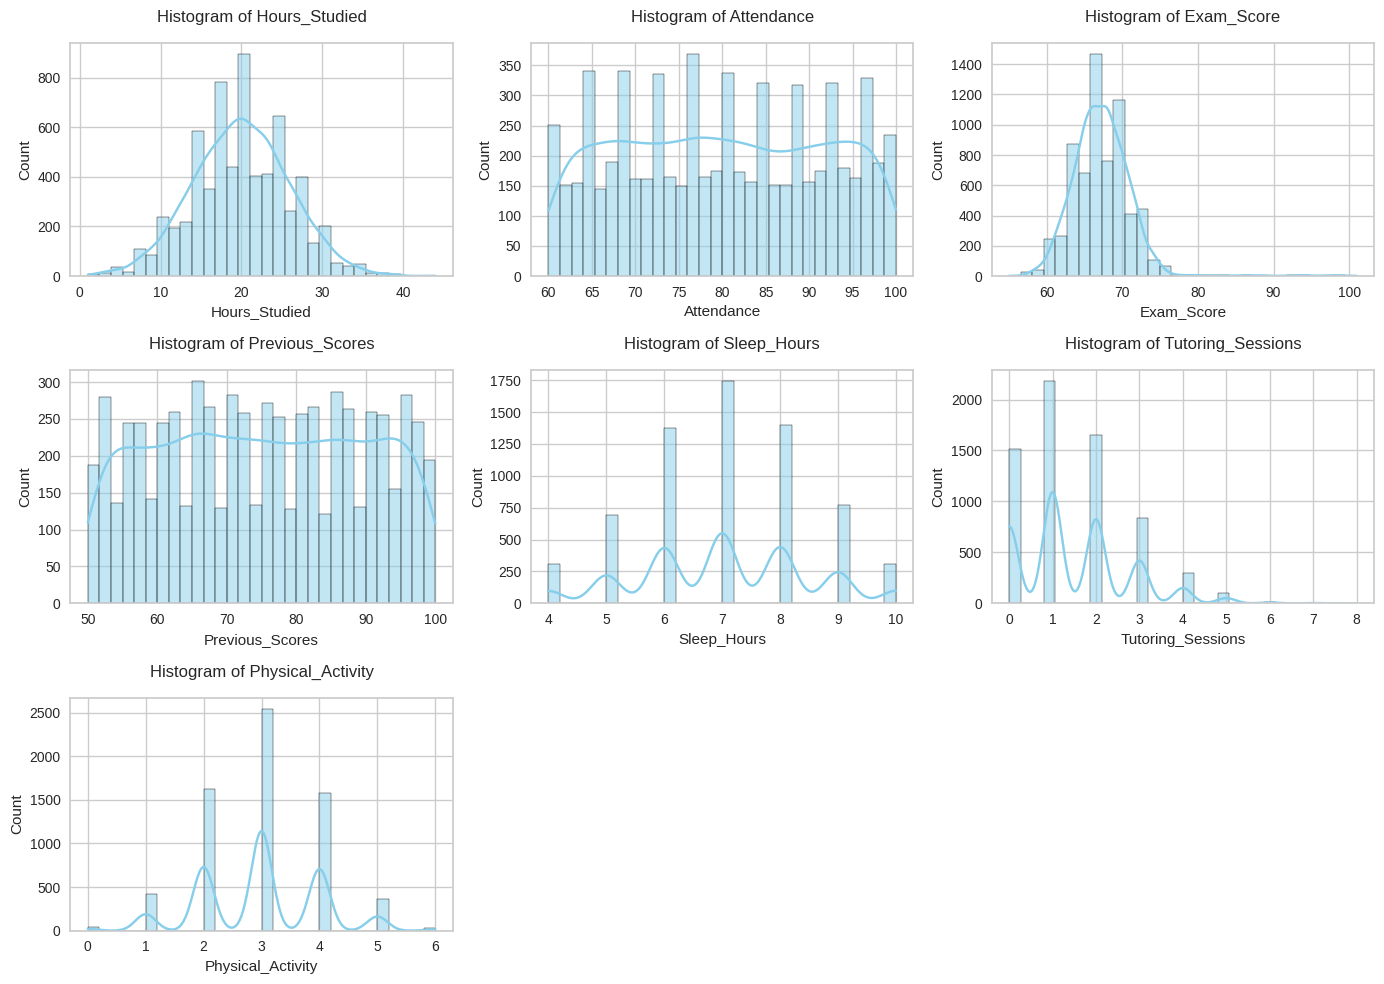

In [81]:
# Create histograms for all numerical columns
plt.figure(figsize=(14, 10))
for i, column in enumerate(numerical_columns):
    plt.subplot(3, 3, i + 1)
    sns.histplot(data[column], kde=True, color='skyblue', bins=30)
    plt.title(f'Histogram of {column}', pad=15)
    plt.xlabel(column)

plt.tight_layout()
plt.show()

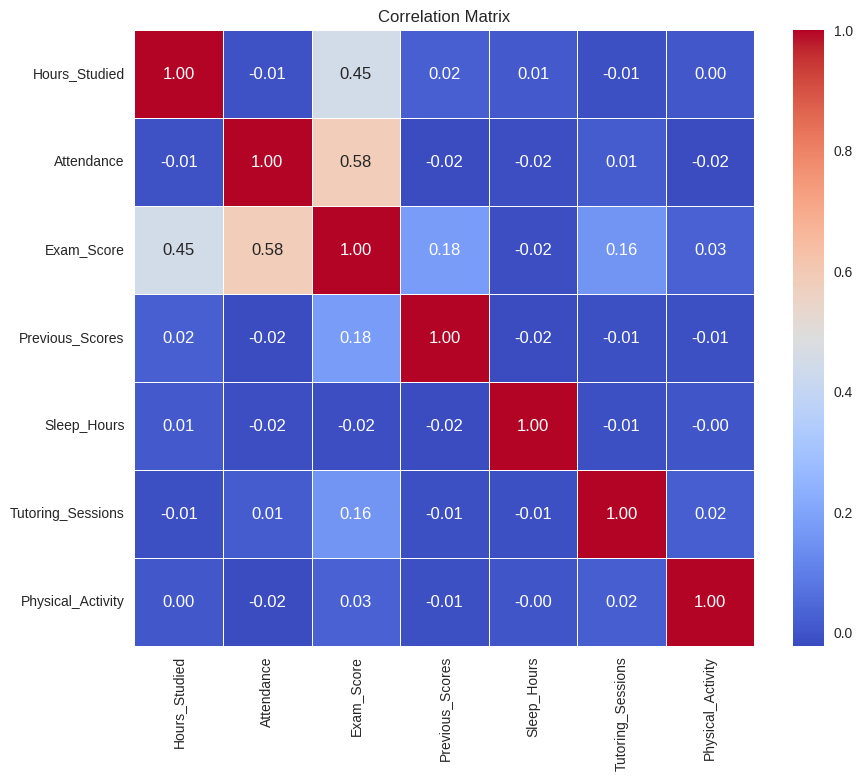

In [82]:
# Compute the correlation matrix
correlation_matrix = data[numerical_columns].corr()

# Plot the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix")
plt.show()

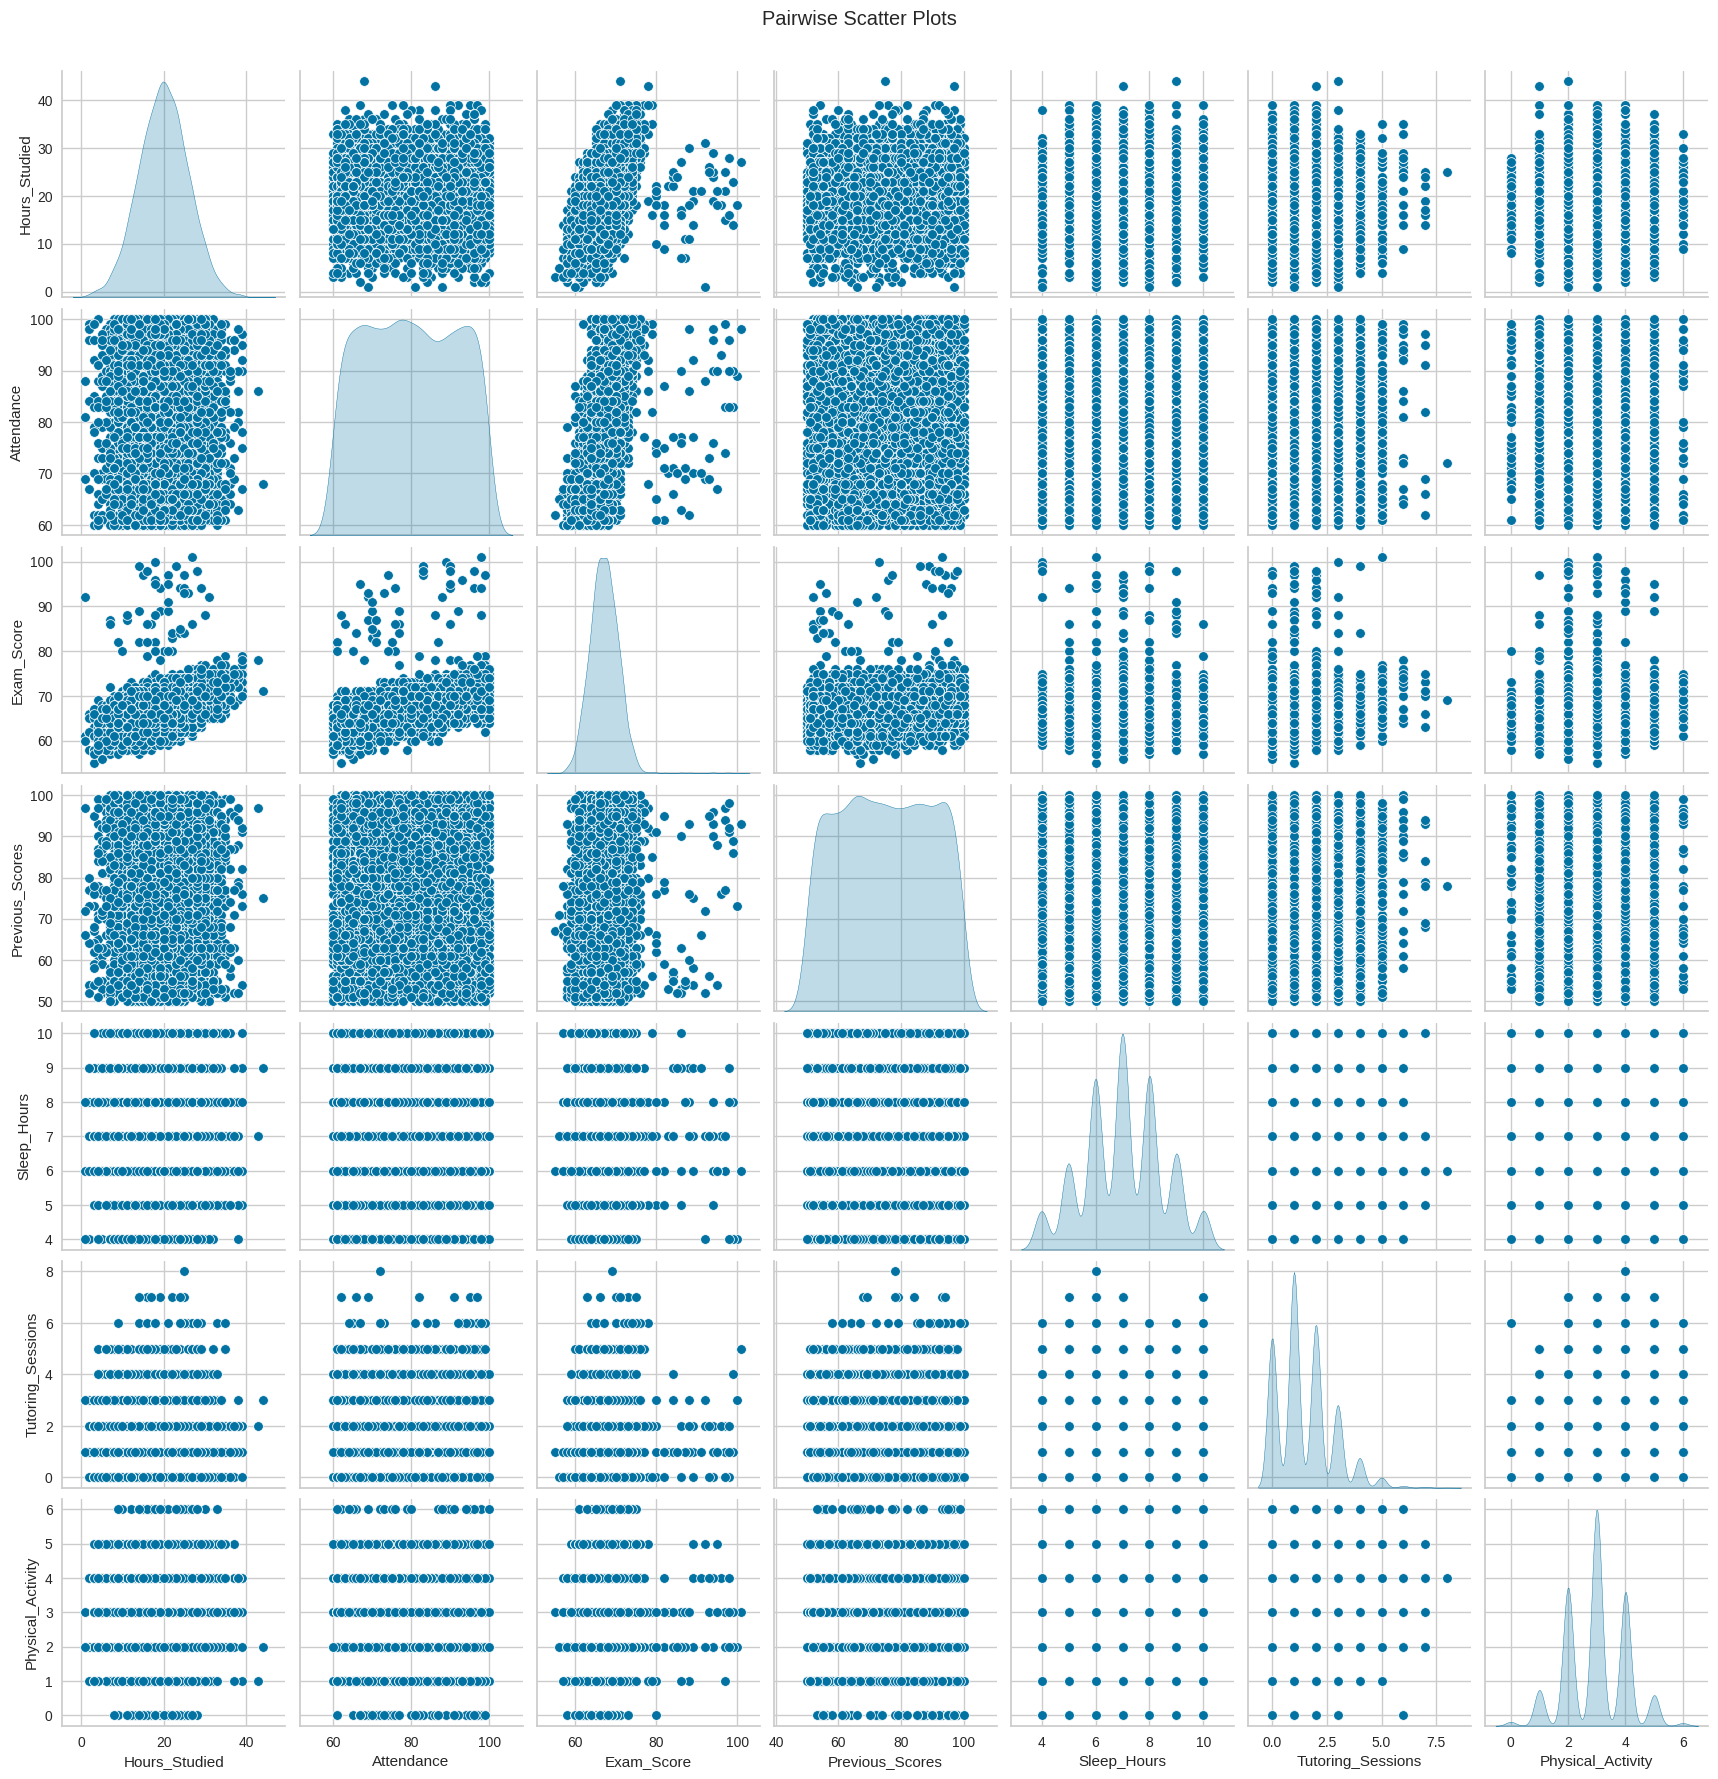

In [83]:
# Pairplot for numerical variables
sns.pairplot(data[numerical_columns], kind='scatter', diag_kind='kde')
plt.suptitle('Pairwise Scatter Plots', y=1.02)
plt.show()

<ipython-input-84-a0610726ef6a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


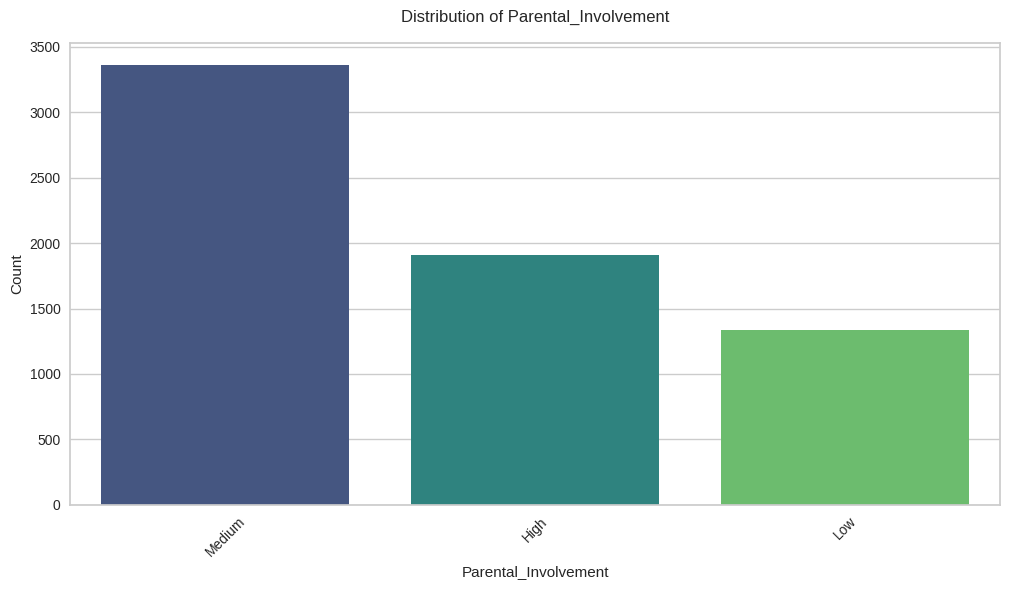

<ipython-input-84-a0610726ef6a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


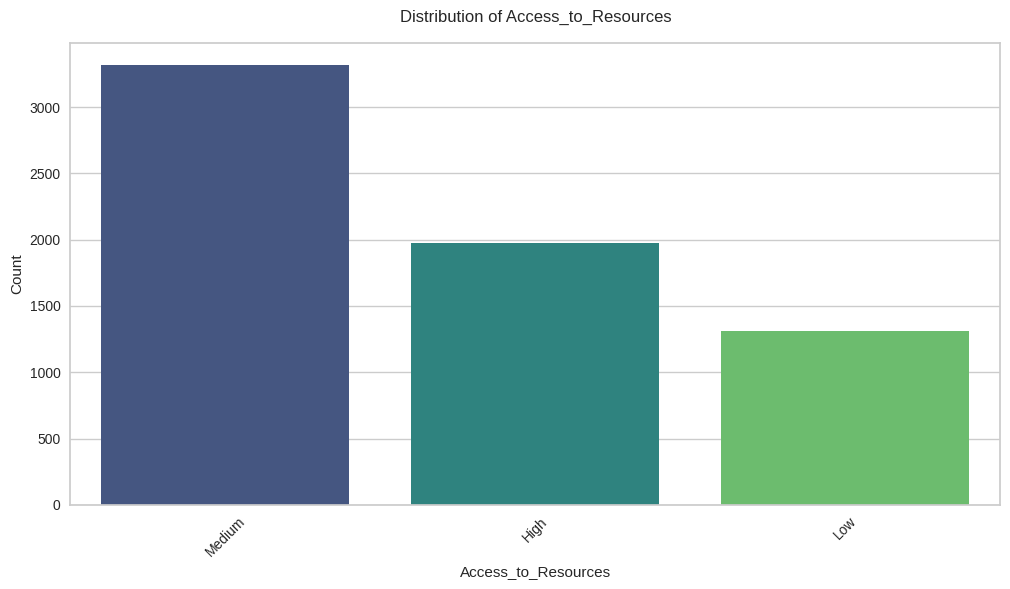

<ipython-input-84-a0610726ef6a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


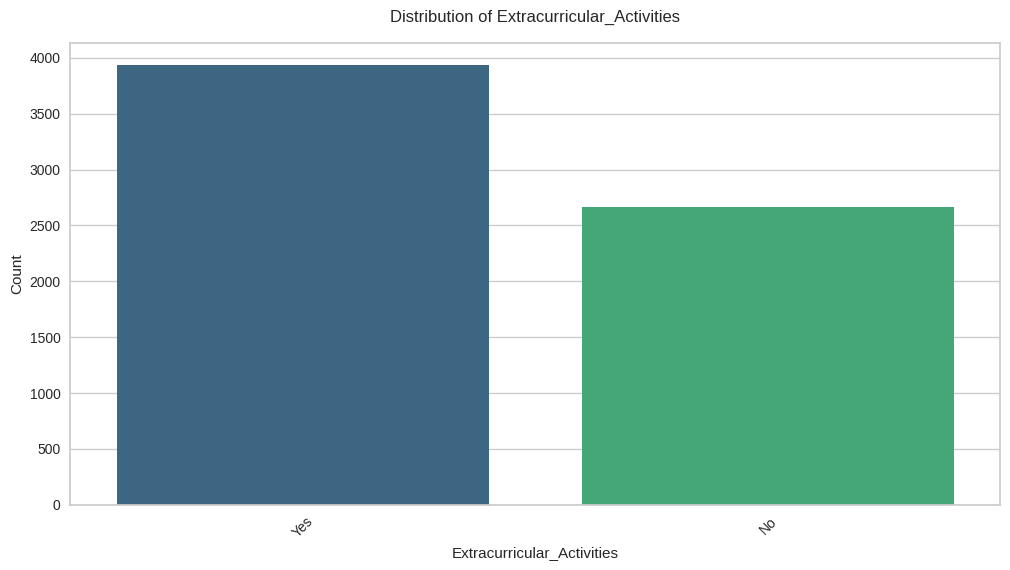

<ipython-input-84-a0610726ef6a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


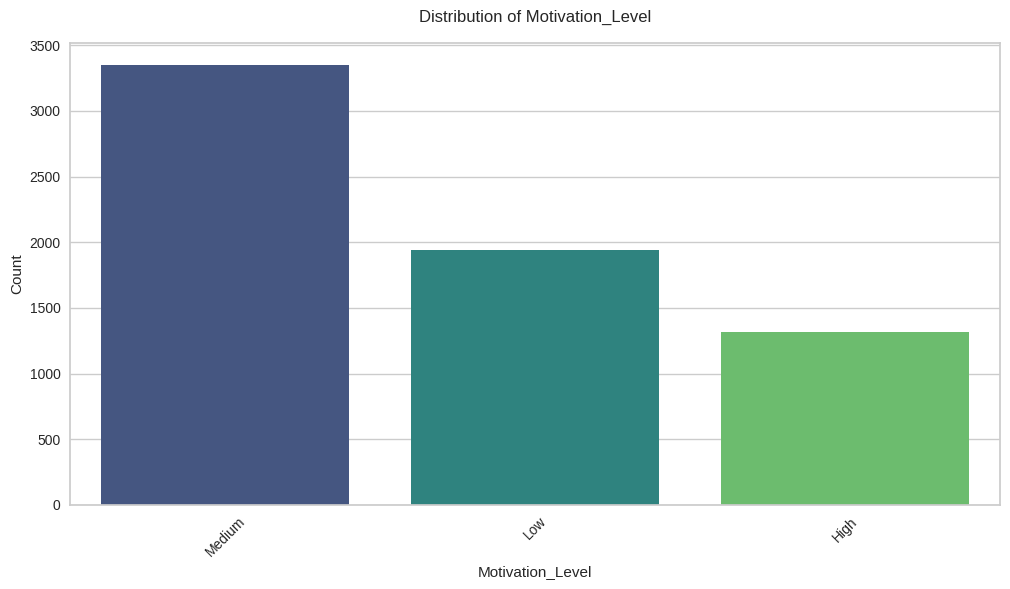

<ipython-input-84-a0610726ef6a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


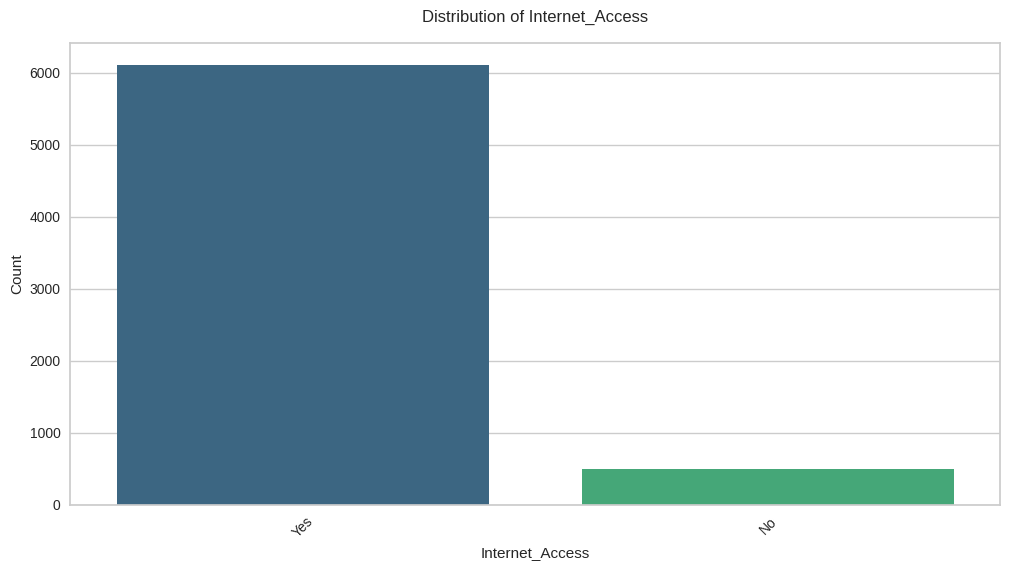

<ipython-input-84-a0610726ef6a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


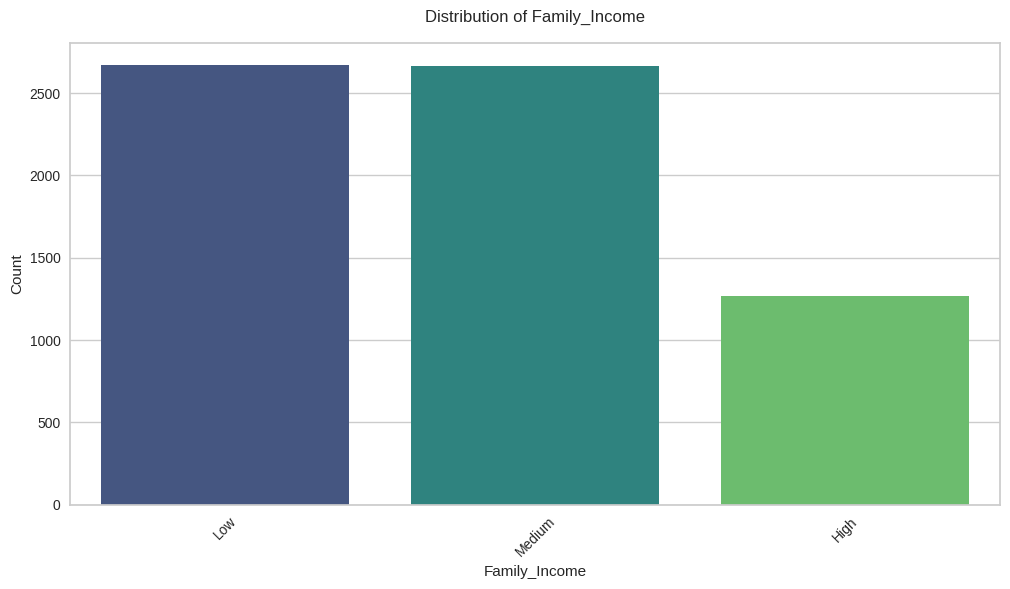

<ipython-input-84-a0610726ef6a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


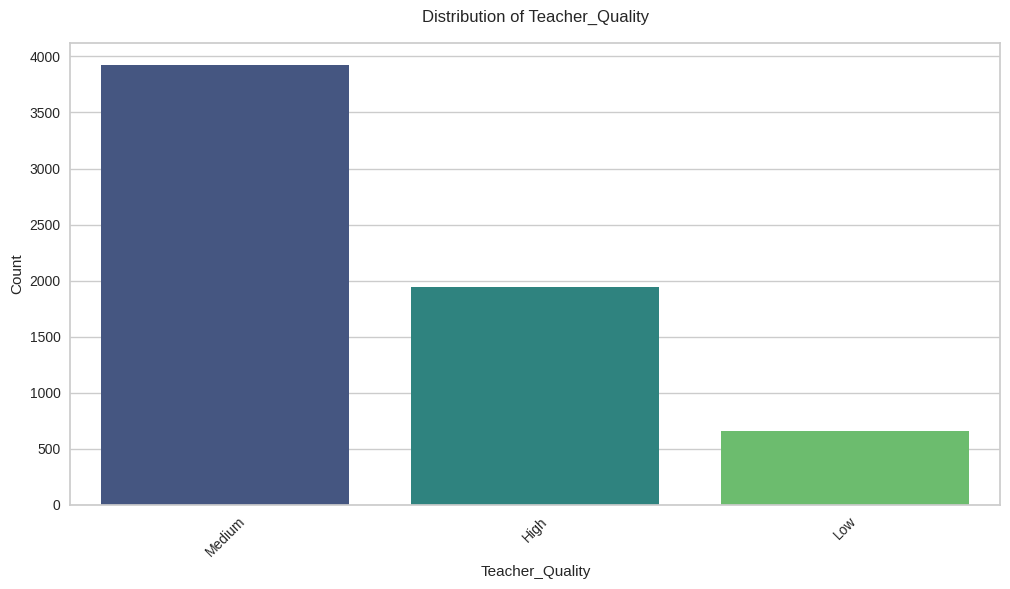

<ipython-input-84-a0610726ef6a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


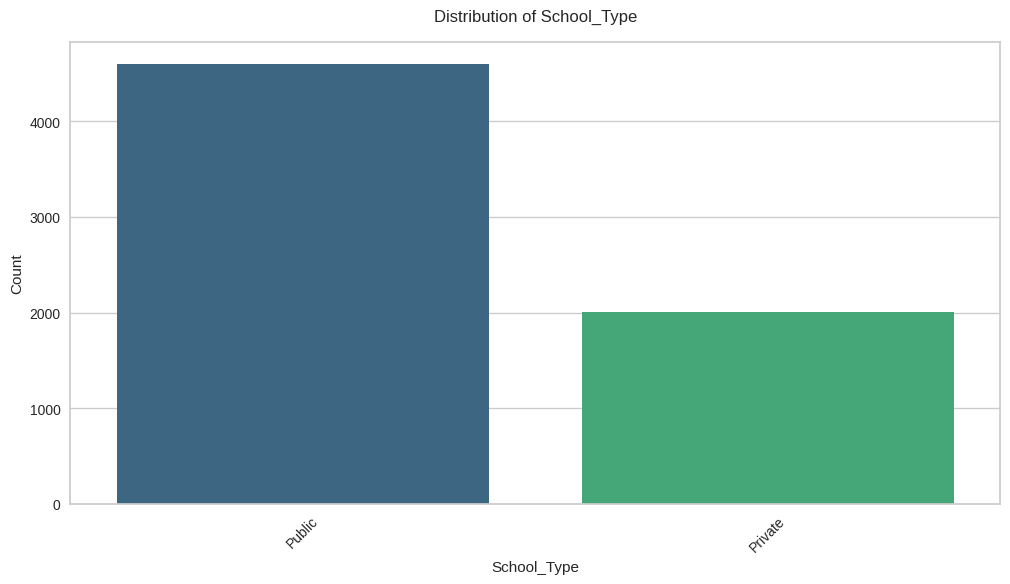

<ipython-input-84-a0610726ef6a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


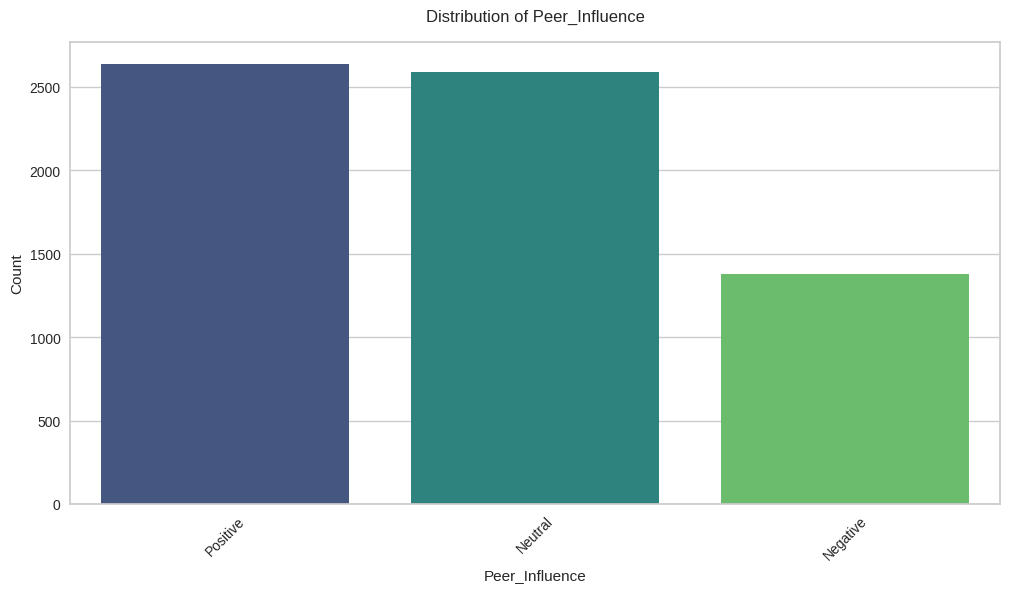

<ipython-input-84-a0610726ef6a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


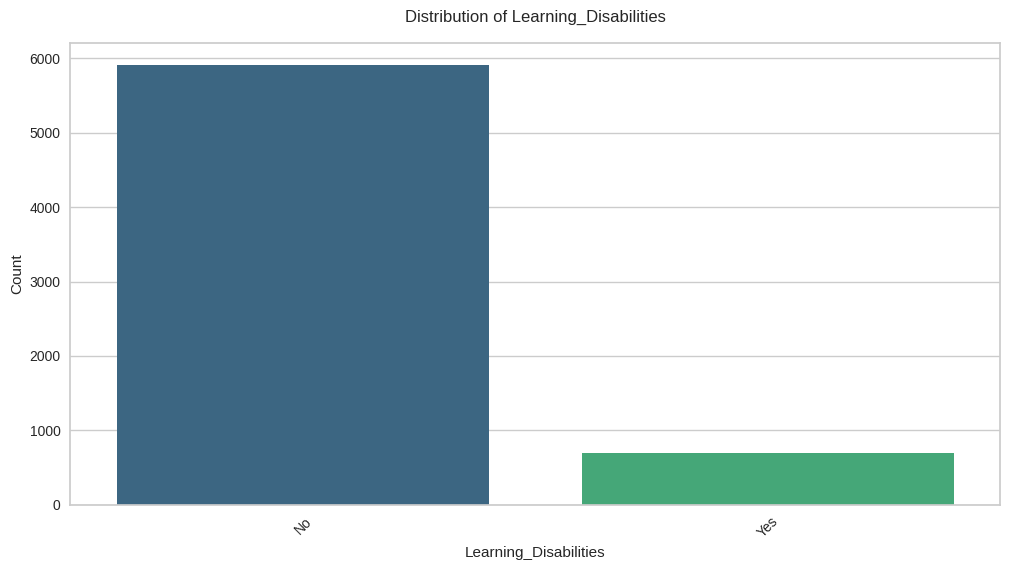

<ipython-input-84-a0610726ef6a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


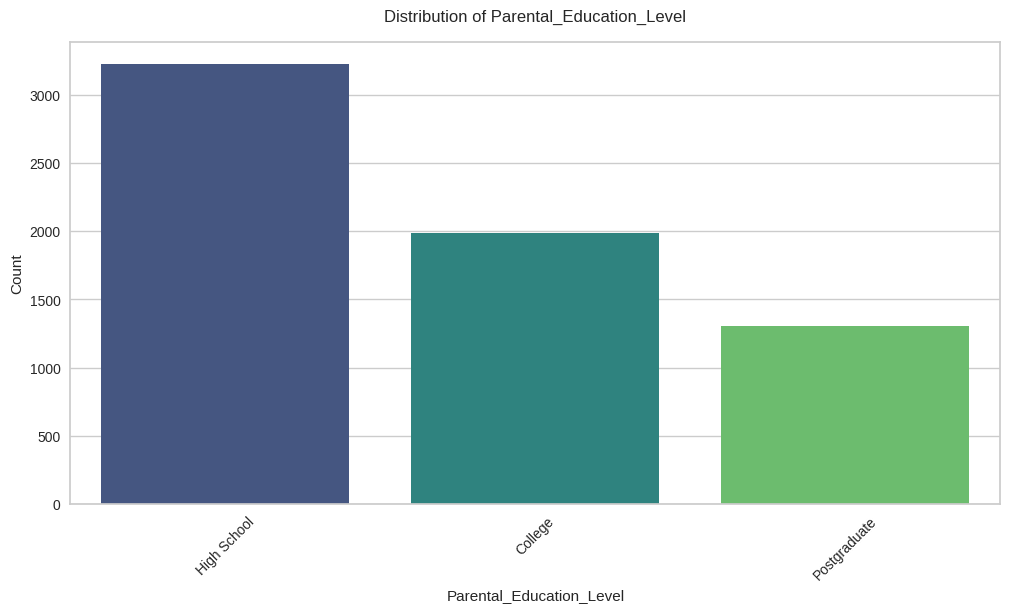

<ipython-input-84-a0610726ef6a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


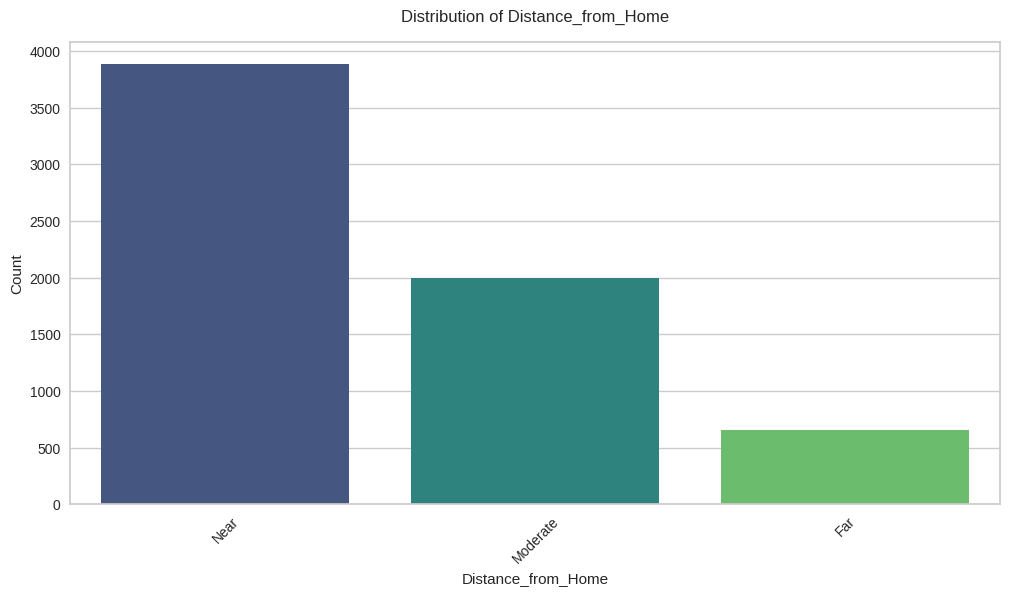

<ipython-input-84-a0610726ef6a>:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')


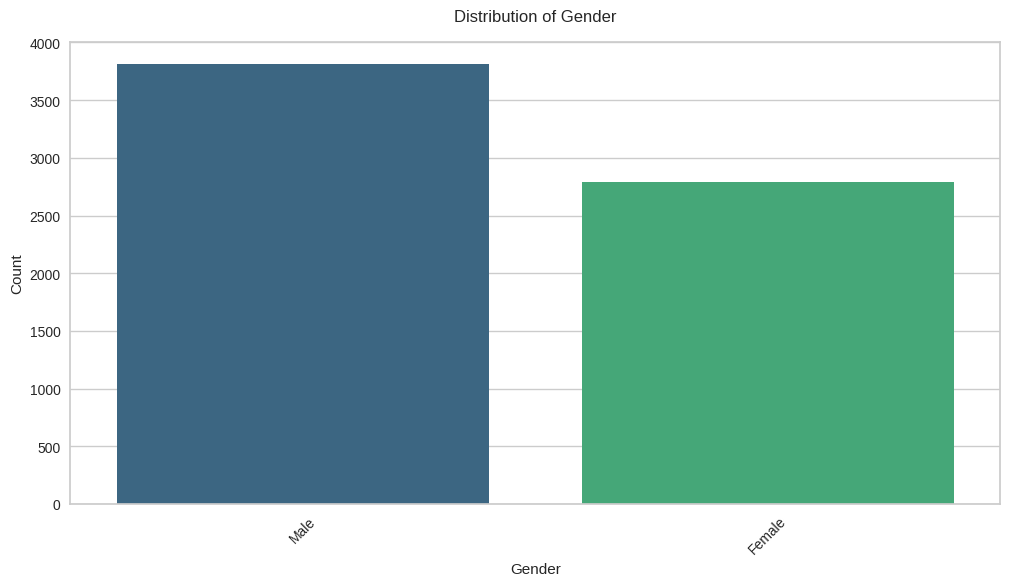

In [84]:
# Identify categorical columns
categorical_columns = data.select_dtypes(include='object').columns

# Create a bar plot for each categorical variable
for col in categorical_columns:
    plt.figure(figsize=(12, 6))
    value_counts = data[col].value_counts().head(10)
    sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
    plt.title(f"Distribution of {col}", pad=15)
    plt.xlabel(col)
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()


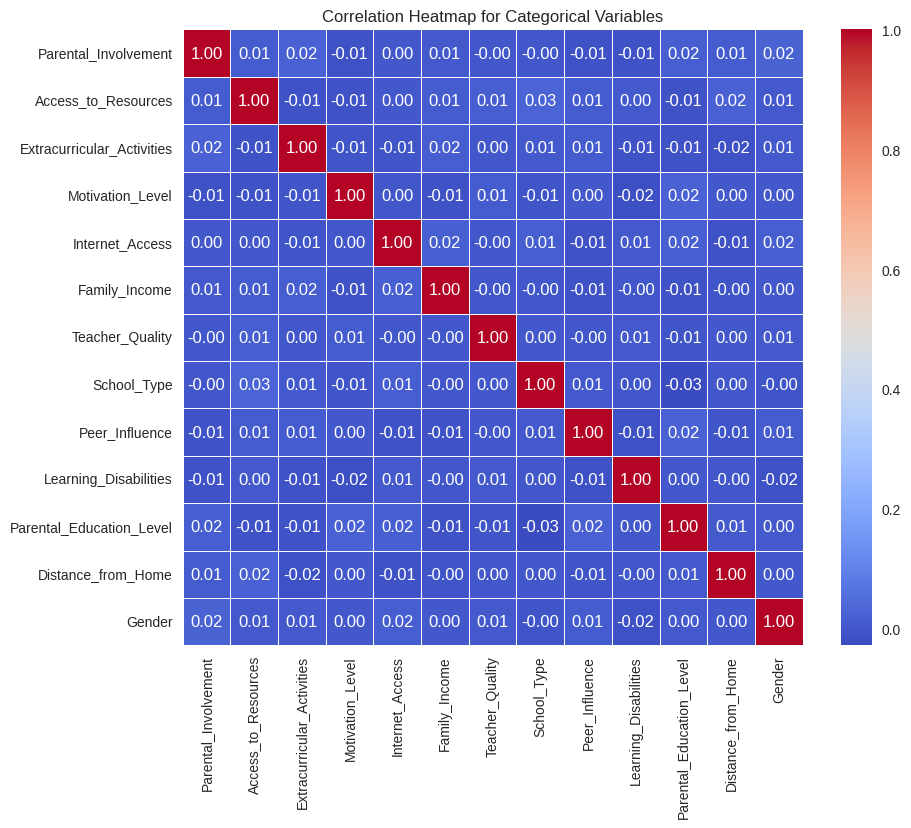

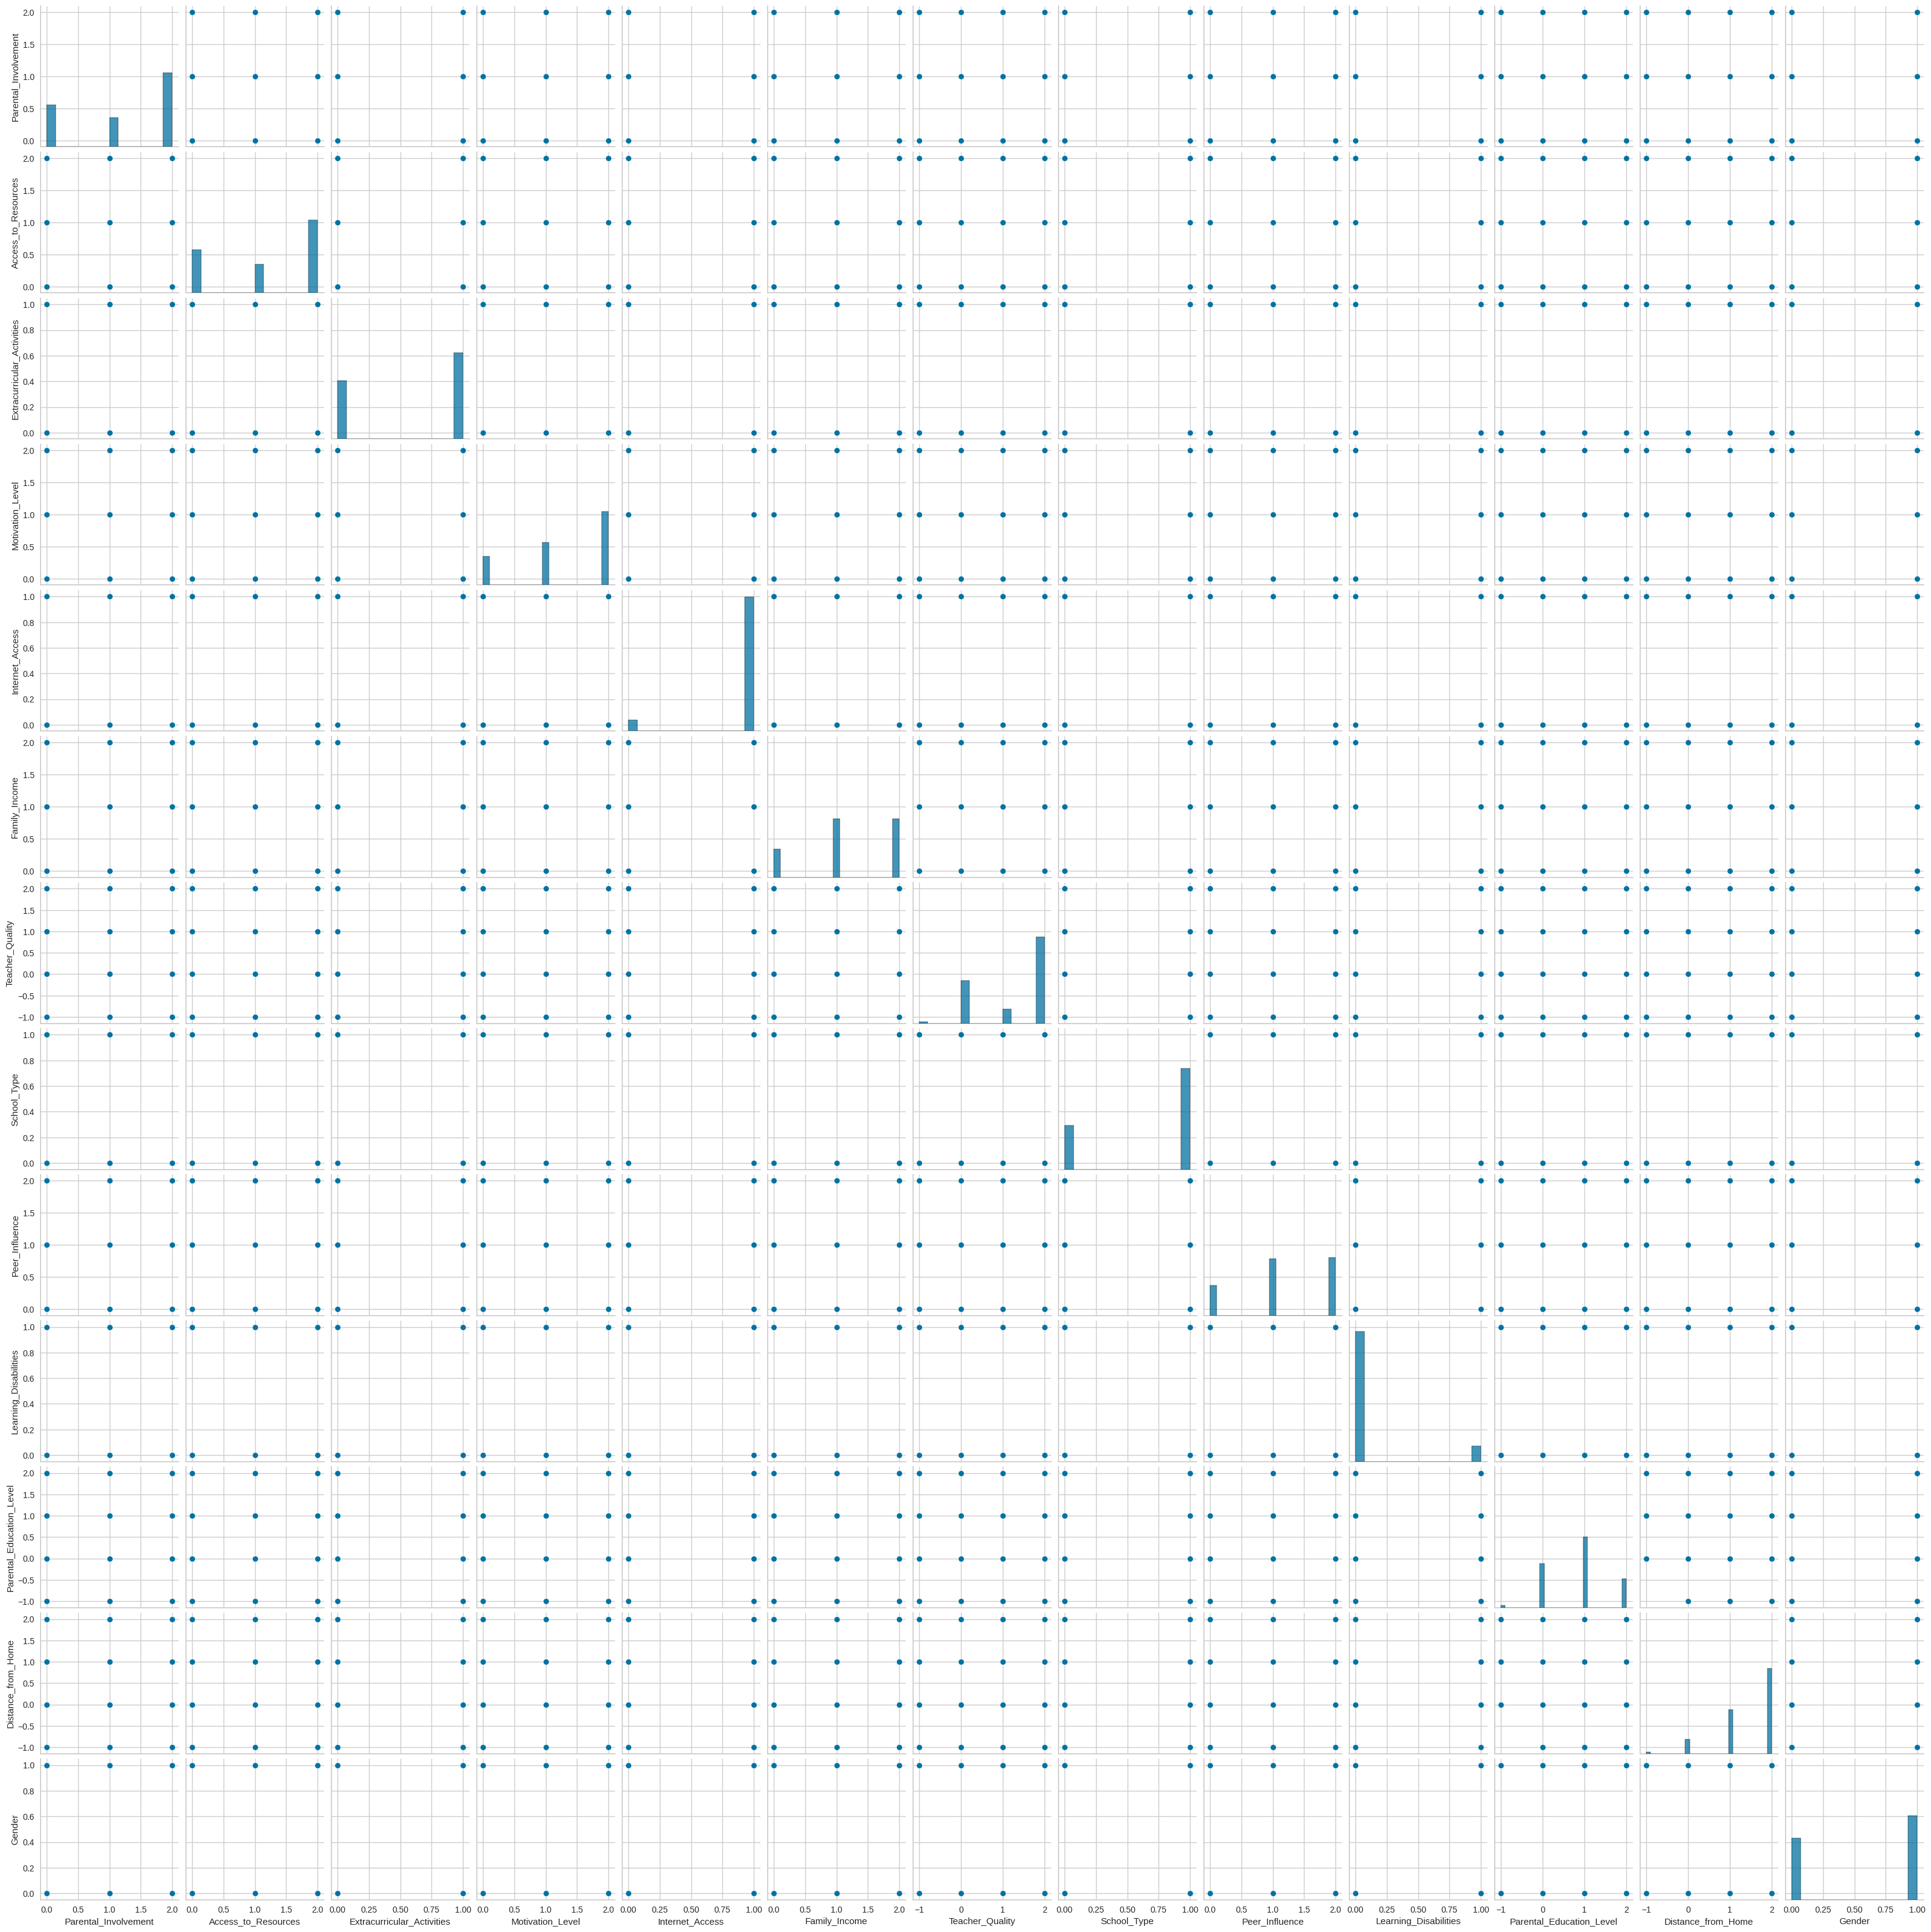

In [85]:
# Encode categorical variables as integers for correlation purposes
encoded_data = data.copy()
for col in categorical_columns:
    encoded_data[col] = encoded_data[col].astype('category').cat.codes

# Compute the correlation matrix for encoded categorical variables
categorical_corr = encoded_data[categorical_columns].corr()

# Plot the heatmap for correlation
plt.figure(figsize=(10, 8))
sns.heatmap(categorical_corr, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap for Categorical Variables")
plt.show()

# Plot a pairplot for encoded categorical variables
sns.pairplot(encoded_data[categorical_columns], diag_kind='hist')
plt.show()


# **5. Data Preprocessing**

Pada tahap ini, data preprocessing adalah langkah penting untuk memastikan kualitas data sebelum digunakan dalam model machine learning. Data mentah sering kali mengandung nilai kosong, duplikasi, atau rentang nilai yang tidak konsisten, yang dapat memengaruhi kinerja model. Oleh karena itu, proses ini bertujuan untuk membersihkan dan mempersiapkan data agar analisis berjalan optimal.

Berikut adalah tahapan-tahapan yang perlu dilakukan, namun **tidak terbatas** pada:
1. Menghapus atau Menangani Data Kosong (Missing Values)
2. Menghapus Data Duplikat
3. Normalisasi atau Standarisasi Fitur
4. Deteksi dan Penanganan Outlier
5. Encoding Data Kategorikal
6. Binning (Pengelompokan Data)

In [86]:
data.dropna(axis=0, how='any', inplace=True)
data

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [87]:
# Drop columns that are not relevant for analysis
data = data.drop(['Extracurricular_Activities','Access_to_Resources', 'Internet_Access', 'Family_Income', 'School_Type','Peer_Influence','Learning_Disabilities','Parental_Involvement','Parental_Education_Level','Physical_Activity','Distance_from_Home','Physical_Activity','Teacher_Quality','Tutoring_Sessions'], axis=1)

In [88]:
data

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Motivation_Level,Gender,Exam_Score
0,23,84,7,73,Low,Male,67
1,19,64,8,59,Low,Female,61
2,24,98,7,91,Medium,Male,74
3,29,89,8,98,Medium,Male,71
4,19,92,6,65,Medium,Female,70
...,...,...,...,...,...,...,...
6602,25,69,7,76,Medium,Female,68
6603,23,76,8,81,Medium,Female,69
6604,20,90,6,65,Low,Female,68
6605,10,86,6,91,High,Female,68


In [89]:
from sklearn.preprocessing import LabelEncoder

# Encode categorical columns
categorical_cols = ['Gender', 'Motivation_Level']
encoder = LabelEncoder()
data[categorical_cols] = data[categorical_cols].apply(encoder.fit_transform)
data

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Motivation_Level,Gender,Exam_Score
0,23,84,7,73,1,1,67
1,19,64,8,59,1,0,61
2,24,98,7,91,2,1,74
3,29,89,8,98,2,1,71
4,19,92,6,65,2,0,70
...,...,...,...,...,...,...,...
6602,25,69,7,76,2,0,68
6603,23,76,8,81,2,0,69
6604,20,90,6,65,1,0,68
6605,10,86,6,91,0,0,68


In [90]:
# IQR method to detect outliers
def detect_outliers(df, col_name):
    Q1 = df[col_name].quantile(0.25)
    Q3 = df[col_name].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[col_name] < lower_bound) | (df[col_name] > upper_bound)]

numerical_col = ['Hours_Studied','Attendance','Previous_Scores','Sleep_Hours','Exam_Score']


outliers = pd.DataFrame()

for col in numerical_col:
    outliers[col] = detect_outliers(data, col)[col]

print(outliers)


      Hours_Studied  Attendance  Previous_Scores  Sleep_Hours  Exam_Score
209              43         NaN              NaN          NaN        78.0
262               1         NaN              NaN          NaN         NaN
478              38         NaN              NaN          NaN         NaN
1061              3         NaN              NaN          NaN         NaN
1101              3         NaN              NaN          NaN        55.0
1539              3         NaN              NaN          NaN         NaN
1615             39         NaN              NaN          NaN        77.0
1957             39         NaN              NaN          NaN        79.0
2024              2         NaN              NaN          NaN         NaN
2035             37         NaN              NaN          NaN        76.0
2305             39         NaN              NaN          NaN         NaN
2506             38         NaN              NaN          NaN         NaN
2521             38         NaN       

In [91]:
data_no_outliers = data.copy()

for col in numerical_col:

    outlier_data = detect_outliers(data_no_outliers, col)
    data_no_outliers = data_no_outliers[~data_no_outliers[col].isin(outlier_data[col])]

print(data_no_outliers.shape)

(6248, 7)


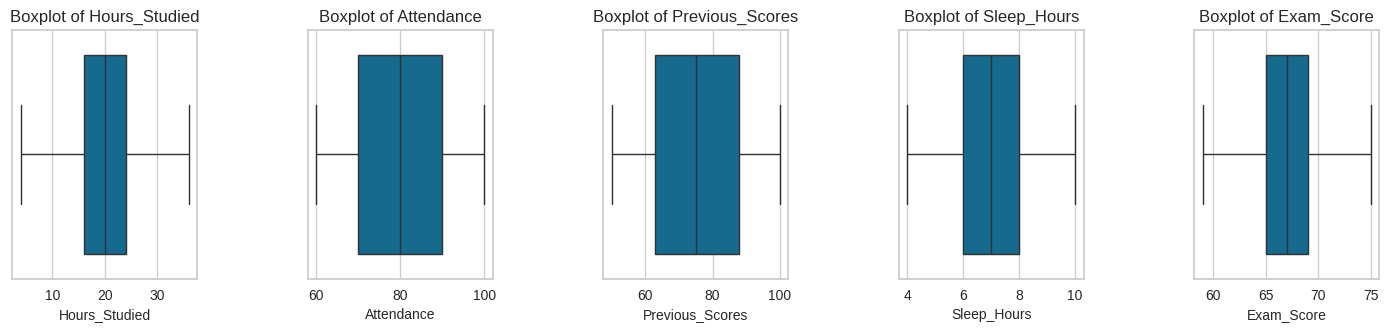

In [92]:

plt.figure(figsize=(15, 8))


for i, column in enumerate(numerical_col):
    plt.subplot(2, len(numerical_col), i + 1)
    sns.boxplot(x=data_no_outliers[column])
    plt.title(f'Boxplot of {column}', fontsize=12)
    plt.xlabel(f'{column}', fontsize=10)
    plt.xticks(fontsize=10)

plt.tight_layout(pad=4.0)

plt.subplots_adjust(hspace=0.6, wspace=0.6)

plt.show()

In [93]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# Scale the data
data_scaled = data_no_outliers.copy()
data_scaled[numerical_col] = scaler.fit_transform(data_no_outliers[numerical_col])

data_scaled

,Hours_Studied,Attendance,Sleep_Hours,Previous_Scores,Motivation_Level,Gender,Exam_Score
0,0.524416,0.346375,-0.024734,-0.145186,1,1,-0.022555
1,-0.167569,-1.392039,0.656056,-1.118346,1,0,-1.872764
2,0.697412,1.563265,-0.024734,1.106019,2,1,2.136021
3,1.562393,0.780979,0.656056,1.592599,2,1,1.210917
4,-0.167569,1.041741,-0.705525,-0.701277,2,0,0.902549
...,...,...,...,...,...,...,...
6602,0.870408,-0.957436,-0.024734,0.063348,2,0,0.285813
6603,0.524416,-0.348991,0.656056,0.410905,2,0,0.594181
6604,0.005427,0.867900,-0.705525,-0.701277,1,0,0.285813
6605,-1.724535,0.520217,-0.705525,1.106019,0,0,0.285813


# **6. Pembangunan Model Clustering**

## **a. Pembangunan Model Clustering**

Pada tahap ini, Anda membangun model clustering dengan memilih algoritma yang sesuai untuk mengelompokkan data berdasarkan kesamaan. Berikut adalah **rekomendasi** tahapannya.
1. Pilih algoritma clustering yang sesuai.
2. Latih model dengan data menggunakan algoritma tersebut.

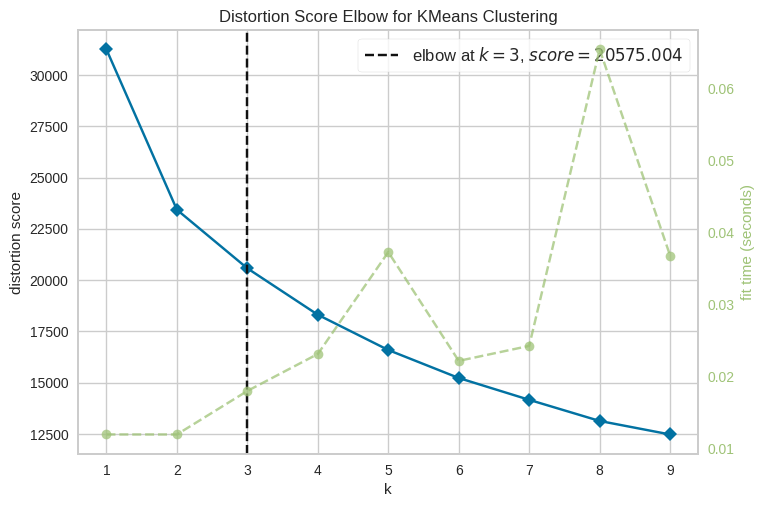

Optimal number of clusters: 3


In [94]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from yellowbrick.cluster import KElbowVisualizer
import matplotlib.pyplot as plt

kmeans = KMeans(random_state=42)

visualizer = KElbowVisualizer(kmeans, k=(1, 10), metric="distortion")

visualizer.fit(data_scaled[numerical_col])

visualizer.show()

optimal_k = visualizer.elbow_value_
print(f"Optimal number of clusters: {optimal_k}")

In [95]:
# Fit the KMeans model using the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

kmeans.fit(data_scaled[numerical_col])

data_scaled['Cluster'] = kmeans.labels_

print(data_scaled)

      Hours_Studied  Attendance  Sleep_Hours  Previous_Scores  \
0          0.524416    0.346375    -0.024734        -0.145186   
1         -0.167569   -1.392039     0.656056        -1.118346   
2          0.697412    1.563265    -0.024734         1.106019   
3          1.562393    0.780979     0.656056         1.592599   
4         -0.167569    1.041741    -0.705525        -0.701277   
...             ...         ...          ...              ...   
6602       0.870408   -0.957436    -0.024734         0.063348   
6603       0.524416   -0.348991     0.656056         0.410905   
6604       0.005427    0.867900    -0.705525        -0.701277   
6605      -1.724535    0.520217    -0.705525         1.106019   
6606      -0.859554   -1.131277     1.336847         1.314553   

      Motivation_Level  Gender  Exam_Score  Cluster  
0                    1       1   -0.022555        1  
1                    1       0   -1.872764        2  
2                    2       1    2.136021        0  
3  

In [96]:
cluster_counts = data_scaled['Cluster'].value_counts()
print(cluster_counts)

Cluster
2    2538
0    1906
1    1804
Name: count, dtype: int64


## **b. Evaluasi Model Clustering**

Untuk menentukan jumlah cluster yang optimal dalam model clustering, Anda dapat menggunakan metode Elbow atau Silhouette Score.

Metode ini membantu kita menemukan jumlah cluster yang memberikan pemisahan terbaik antar kelompok data, sehingga model yang dibangun dapat lebih efektif. Berikut adalah **rekomendasi** tahapannya.
1. Gunakan Silhouette Score dan Elbow Method untuk menentukan jumlah cluster optimal.
2. Hitung Silhouette Score sebagai ukuran kualitas cluster.

In [97]:
from sklearn.metrics import silhouette_score

# Compute the silhouette score
sil_score = silhouette_score(data_scaled.drop('Cluster', axis=1), data_scaled['Cluster'])

print(f"Silhouette Score: {sil_score}")

Silhouette Score: 0.1540733853535239


## **c. Feature Selection (Opsional)**

Silakan lakukan feature selection jika Anda membutuhkan optimasi model clustering. Jika Anda menerapkan proses ini, silakan lakukan pemodelan dan evaluasi kembali menggunakan kolom-kolom hasil feature selection. Terakhir, bandingkan hasil performa model sebelum dan sesudah menerapkan feature selection.

In [98]:
# Remove the selected columns
reduced_data = data_no_outliers.drop(columns= ['Gender','Previous_Scores','Sleep_Hours'])

# Scale the remaining numerical data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(reduced_data)

# Initialize KMeans with the optimal number of clusters
kmeans = KMeans(n_clusters=optimal_k, random_state=42)

# Fit the KMeans model and assign labels
kmeans.fit(scaled_data)

# Add cluster labels to the dataset
reduced_data['Cluster'] = kmeans.labels_

print(reduced_data)

      Hours_Studied  Attendance  Motivation_Level  Exam_Score  Cluster
0                23          84                 1          67        0
1                19          64                 1          61        1
2                24          98                 2          74        2
3                29          89                 2          71        2
4                19          92                 2          70        2
...             ...         ...               ...         ...      ...
6602             25          69                 2          68        1
6603             23          76                 2          69        2
6604             20          90                 1          68        0
6605             10          86                 0          68        0
6606             15          67                 2          64        1

[6248 rows x 5 columns]


In [99]:
# Scale the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(reduced_data)

from sklearn.decomposition import PCA

# Apply PCA to reduce dimensions
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_data)

# Initialize and fit KMeans on the PCA-transformed data
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(pca_data)

# Calculate silhouette score
silhouette_avg = silhouette_score(pca_data, kmeans.labels_)

# Show the silhouette score
print(f"Silhouette Score after PCA: {silhouette_avg}")

reduced_data['Cluster'] = kmeans.labels_
print(reduced_data.head())

Silhouette Score after PCA: 0.5554933688612373
   Hours_Studied  Attendance  Motivation_Level  Exam_Score  Cluster
0             23          84                 1          67        0
1             19          64                 1          61        2
2             24          98                 2          74        1
3             29          89                 2          71        1
4             19          92                 2          70        1


Sebelum melakukan feature selection, hasil silhoutte score nya hanya berada pada angka 0.15, setelah menerapkan feature selection, dengan mengurangi beberapa kolom yang dianggap tidak terlalu berpengaruh untuk analsis clustering, didapat peningkatan nilai silhoutte yaitu sampai dengan angka 0.55

## **d. Visualisasi Hasil Clustering**

Setelah model clustering dilatih dan jumlah cluster optimal ditentukan, langkah selanjutnya adalah menampilkan hasil clustering melalui visualisasi.

Berikut adalah **rekomendasi** tahapannya.
1. Tampilkan hasil clustering dalam bentuk visualisasi, seperti grafik scatter plot atau 2D PCA projection.

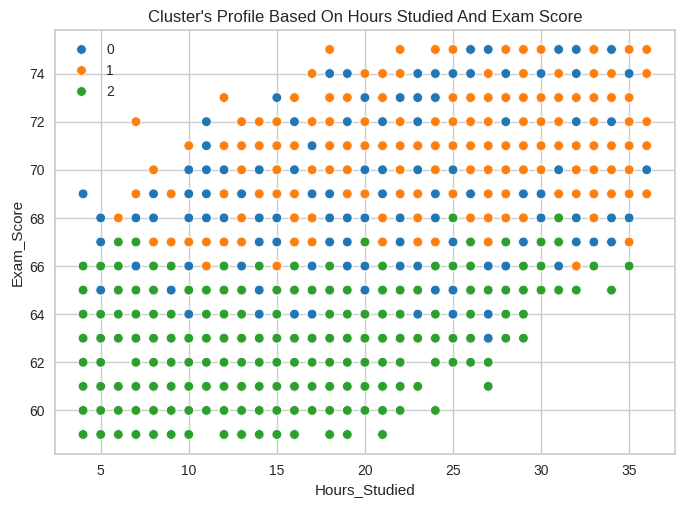

In [100]:
pal = ['#1f77b4', '#ff7f0e', '#2ca02c']
pl = sns.scatterplot(data = reduced_data,x=reduced_data["Hours_Studied"], y=reduced_data["Exam_Score"],hue=reduced_data["Cluster"], palette= pal)
pl.set_title("Cluster's Profile Based On Hours Studied And Exam Score")
plt.legend()
plt.show()

## **e. Analisis dan Interpretasi Hasil Cluster**

Setelah melakukan clustering, langkah selanjutnya adalah menganalisis karakteristik dari masing-masing cluster berdasarkan fitur yang tersedia.

Berikut adalah **rekomendasi** tahapannya.
1. Analisis karakteristik tiap cluster berdasarkan fitur yang tersedia (misalnya, distribusi nilai dalam cluster).
2. Berikan interpretasi: Apakah hasil clustering sesuai dengan ekspektasi dan logika bisnis? Apakah ada pola tertentu yang bisa dimanfaatkan?

In [110]:
#Analisis karakteristik setiap cluster
cluster_means = reduced_data.groupby('Cluster').mean()
cluster_means = cluster_means.T
cluster_means

Cluster,0,1,2
Hours_Studied,20.210884,22.258375,17.618655
Attendance,81.578231,88.759982,70.551844
Motivation_Level,0.354875,1.781551,1.594360
Exam_Score,67.759637,69.712712,64.052495


<ipython-input-104-6d9e766dd0ce>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")


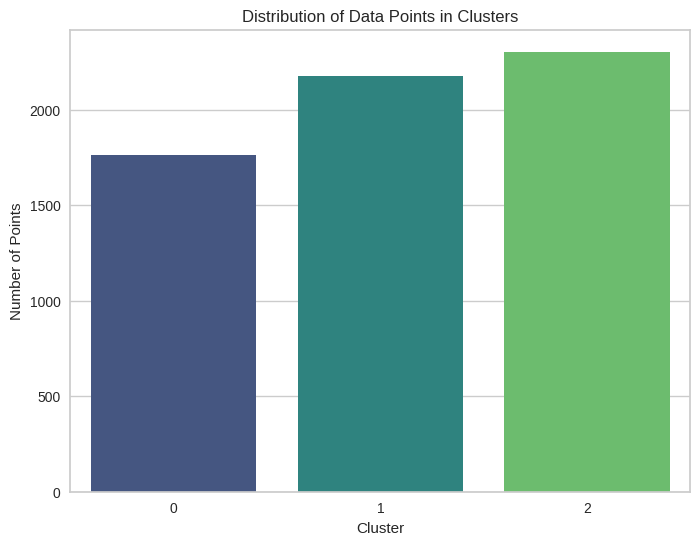

In [104]:
# Step 1: Count the number of points in each cluster
cluster_counts = reduced_data["Cluster"].value_counts().sort_index()

# Step 2: Visualize the counts with a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=cluster_counts.index, y=cluster_counts.values, palette="viridis")

# Add titles and labels
plt.title("Distribution of Data Points in Clusters")
plt.xlabel("Cluster")
plt.ylabel("Number of Points")
plt.show()

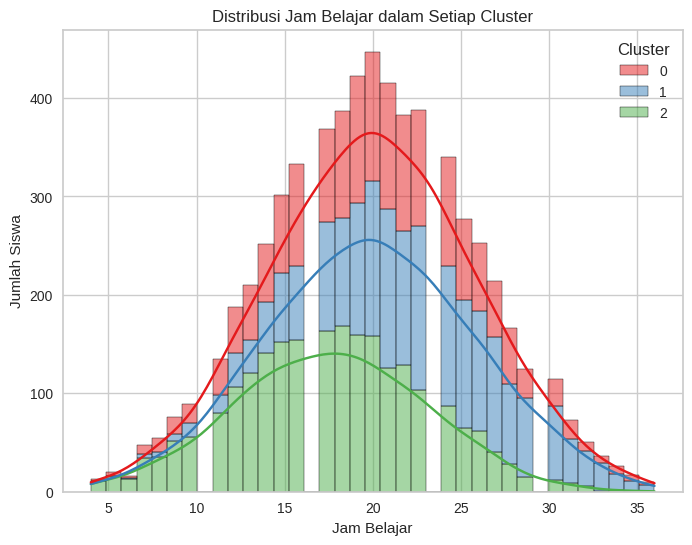

In [105]:
plt.figure(figsize=(8, 6))
sns.histplot(data=reduced_data, x="Hours_Studied", hue="Cluster", kde=True, palette="Set1", multiple="stack")
plt.title("Distribusi Jam Belajar dalam Setiap Cluster")
plt.xlabel("Jam Belajar")
plt.ylabel("Jumlah Siswa")
plt.show()

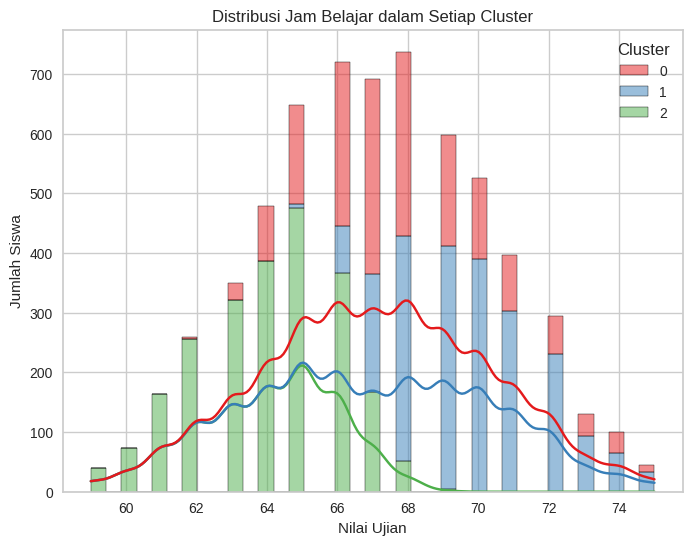

In [106]:
plt.figure(figsize=(8, 6))
sns.histplot(data=reduced_data, x="Exam_Score", hue="Cluster", kde=True, palette="Set1", multiple="stack")
plt.title("Distribusi Jam Belajar dalam Setiap Cluster")
plt.xlabel("Nilai Ujian")
plt.ylabel("Jumlah Siswa")
plt.show()

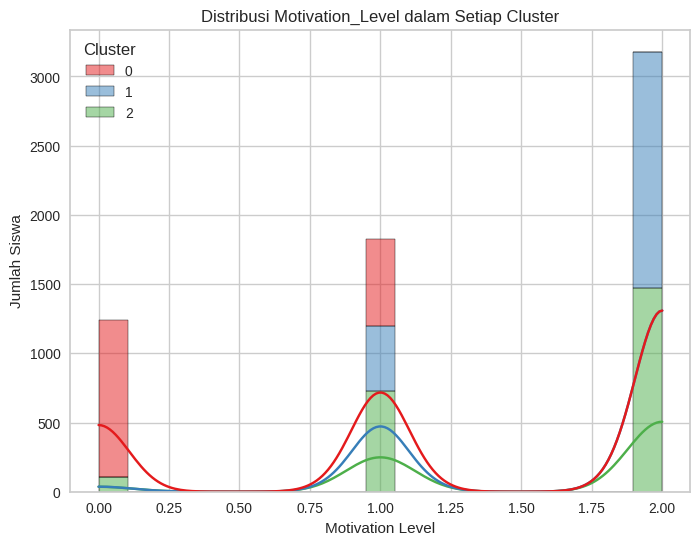

In [111]:
plt.figure(figsize=(8, 6))
sns.histplot(data=reduced_data, x="Motivation_Level", hue="Cluster", kde=True, palette="Set1", multiple="stack")
plt.title("Distribusi Motivation_Level dalam Setiap Cluster")
plt.xlabel("Motivation Level")
plt.ylabel("Jumlah Siswa")
plt.show()

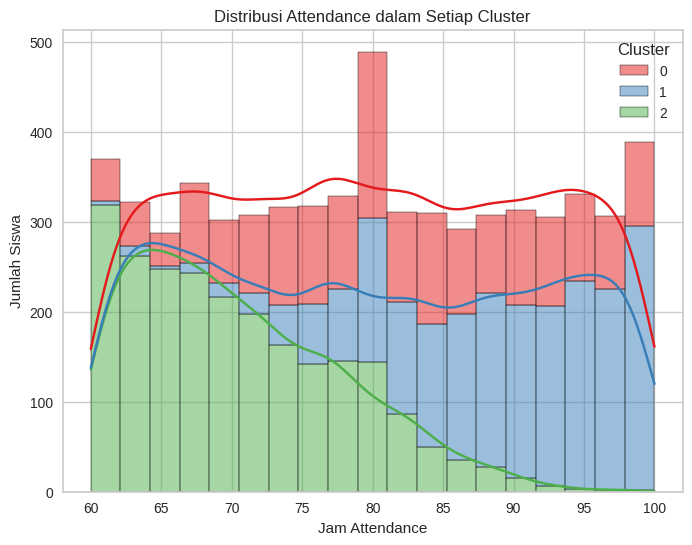

In [108]:
plt.figure(figsize=(8, 6))
sns.histplot(data=reduced_data, x="Attendance", hue="Cluster", kde=True, palette="Set1", multiple="stack")
plt.title("Distribusi Attendance dalam Setiap Cluster")
plt.xlabel("Jam Attendance")
plt.ylabel("Jumlah Siswa")
plt.show()

Tulis hasil interpretasinya di sini.
1. Cluster 0: Hasil cluster menunjukkan bahwa performa dari siswa yang berada pada level medium. Dari hasil cluster menunjukkan bahwa semakin tinggi tingkat jam belajar siswa, maka kemungkinan untuk mendapatkan nilai yang tinggi. Dengan karakteristik cluster yang berada pada kelas ini yaitu rata- rata belajar 20 jam, dengan tingkat kehadiran sebanyak 81, dan nilai ujiannya berada pada rata rata nilai 67.5
2. Cluster 1: Hasil cluster menunjukkan bahwa performa dari siswa yang berada pada level tinggi. Pada cluster ini menunjukkan semakin tinggi waktu jam belajar siswa, maka semakin tinggi pula nilai ujiannya. Dengan karakteristik rata-rata belajar siswa yaitu 22 jam , dengan tingkat rata-rata kehadiran 89 dan rata-rata nilai ujiannya yaitu 69.
3. Cluster 2: Hasil cluster menunjukkan bahwa performa dari siswa yang berada pada level rendah. Pada cluster ini, menunjukkan bahwa semakin rendah waktu belajar siswa, maka kemungkinan untuk mendapat nilai ujian rendah cukup tinggi. Dengan karakteristik rata-rata belajar siswa yaitu 17 jam, dengan rata-rata kehadiran 70, dan rata-rata nilai ujiannya yaitu 64.

Analisis ini menunjukkan bahwa tingkat lamanya jam belajar siswa serta attendance mempengaruhi kemungkinan siswa untuk mendapat nilai ujian yang tinggi ataupun rendah. Motivasi level yang tinggi cenderung berada pada cluster 0, sedangkan motivasi level yang medium cenderung berada pada cluster 1 dan 2, dan motivasi level yang rendah menunjukkan rata tersebar di ketiga cluster tersebut. Ini menunjukkan bahwa variabel ini tidak terlalu berpengaruh pada analisis clustering performa siswa kali ini.

# **7. Mengeksport Data**

Simpan hasilnya ke dalam file CSV.

In [112]:
reduced_data.to_csv('hasil_clustering.csv', index=False)

print("Hasil clustering telah disimpan ke dalam file 'hasil_clustering.csv'.")

Hasil clustering telah disimpan ke dalam file 'hasil_clustering.csv'.
